<a href="https://colab.research.google.com/github/jungeun919/Keras_study/blob/main/Hands-On/Decision_Tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 결정 트리 학습과 시각화

In [ ]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

iris = load_iris() # 데이터 불러오기
X = iris.data[:, 2:] # 꽃잎의 길이와 너비
y = iris.target

tree_clf = DecisionTreeClassifier(max_depth=2) # 깊이가 최대 2개까지
tree_clf.fit(X, y) # DecisionTreeClassifier 훈련

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

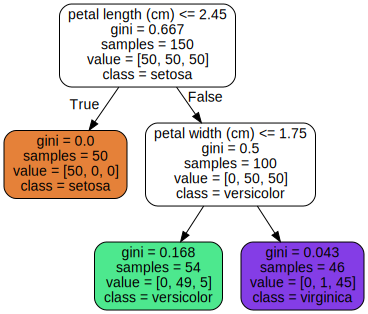

In [ ]:
from graphviz import Source
from sklearn.tree import export_graphviz
import os

PROJECT_ROOT_DIR = "."
CHAPTER_ID = "decision_trees"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

# export_graphviz() 함수를 사용해 그래프 정의를 iris_tree.dot 파일로 출력하여
# 훈련된 결정 트리를 시각화
export_graphviz(
    tree_clf,
    out_file=os.path.join(IMAGES_PATH, "iris_tree.dot"),
    feature_names=iris.feature_names[2:],
    class_names=iris.target_names,
    rounded=True,
    filled=True
)

Source.from_file(os.path.join(IMAGES_PATH, "iris_tree.dot"))

In [ ]:
tree_clf4 = DecisionTreeClassifier(max_depth=4) # 깊이가 최대 4개까지
tree_clf4.fit(X, y) # DecisionTreeClassifier 훈련

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

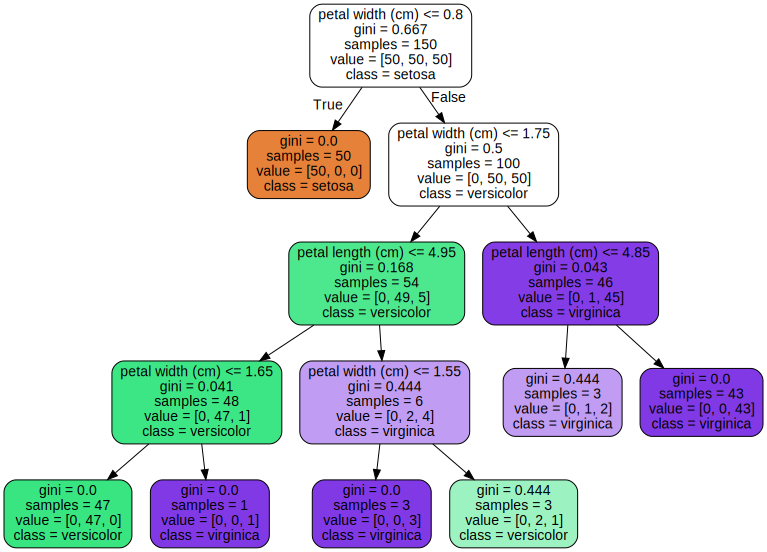

In [ ]:
# 훈련된 결정 트리를 시각화
export_graphviz(
    tree_clf4,
    out_file=os.path.join(IMAGES_PATH, "iris_tree4.dot"),
    feature_names=iris.feature_names[2:],
    class_names=iris.target_names,
    rounded=True,
    filled=True
)

Source.from_file(os.path.join(IMAGES_PATH, "iris_tree4.dot"))
# 일반화를 하는 것이 머신러닝의 궁극적인 목적이기 때문에
# 깊이를 너무 많이 만들어서 과대적합이 되지 않도록 해야 함(규제 적용)

# 클래스 확률 추정

In [ ]:
tree_clf.predict_proba([[5, 1.5]]) # 각 클래스에 속할 확률 출력

array([[0.        , 0.90740741, 0.09259259]])

In [ ]:
tree_clf.predict([[5, 1.5]]) # 가장 높은 확률을 가진 클래스 출력

array([1])

In [ ]:
iris.target_names[tree_clf.predict([[5, 1.5]])] # 예측된 클래스의 이름 출력

array(['versicolor'], dtype='<U10')

In [ ]:
tree_clf.predict_proba([[5, 0.5]]) # 각 클래스에 속할 확률 출력

array([[0.        , 0.90740741, 0.09259259]])

# 회귀

In [ ]:
import numpy as np

# 2차원 데이터셋 + 잡음
np.random.seed(42)
m = 200
X = np.random.rand(m, 1)
y = 4 * (X - 0.5) ** 2
y = y + np.random.randn(m, 1) / 10

In [ ]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(max_depth=2) # 깊이가 최대 2개까지
tree_reg.fit(X, y) # DecisionTreeRegreesor 훈련

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=2,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

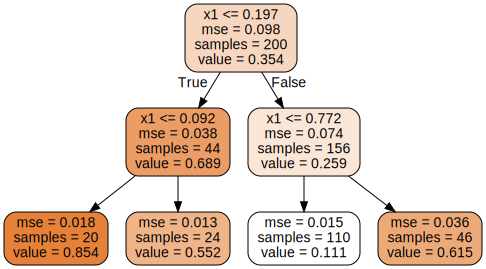

In [ ]:
# 훈련된 결정 트리를 시각화
export_graphviz(
        tree_reg,
        out_file=os.path.join(IMAGES_PATH, "iris_reg.dot"),
        feature_names=["x1"],
        rounded=True,
        filled=True
)

Source.from_file(os.path.join(IMAGES_PATH, "iris_reg.dot"))

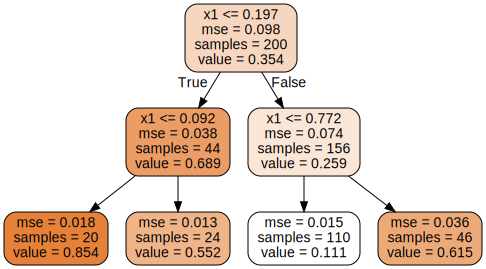

In [ ]:
# 훈련된 결정 트리를 시각화
export_graphviz(
    tree_reg,
    out_file=os.path.join(IMAGES_PATH, "regression_tree.dot"),
    feature_names=["x1"],
    rounded=True,
    filled=True
)

Source.from_file(os.path.join(IMAGES_PATH, "regression_tree.dot"))